# Project: Analyzing posting hours that get the most comments in Hacker News

## Content
- [Introduction](#intro)
- [Objective](#obj)
- [Data analysis](#anal)
- [Conclusion](#conclude)

<a id=intro></a>
## Introduction

[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

The description of attrubutes and data file can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts/home)

<a id=obj></a>
## Objective

The objective of this project is to find out when should be the best time to create a post to get high chance of comments.

<a id=anal></a>
## Data analysis

Posts are categorized by titles begining with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. 

Let's start by importing the libraries we need and reading the data set into a list of lists.

In [2]:
# import modules and functions
from csv import reader
import datetime as dt

In [3]:
# read csv file
open_file = open('hacker_news.csv')
read_file = reader(open_file)
hn = list(read_file)

# show 5 rows of hn
print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [4]:
# Extract the first row of data, and assign it to the variable headers
headers = hn[0]
#Remove the first row from hn
hn = hn[1:]
# Display headers
print(headers)
#Display the first five rows of hn to verify that the header row was removed properly
print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


In [5]:
# Create three empty lists called ask_posts, show_posts, and other_posts.
ask_posts = []; show_posts = []; other_posts = []

# Loop through each row in hn
for row in hn:
    # Assign the title in each row to a variable named title
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
# Check the number of posts in ask_posts, show_posts, and other_posts
len(ask_posts),len(show_posts),len(other_posts)

(1744, 1162, 17194)

After categorizing the types of post, it shows that there are **1744** of ask_posts, **1162** show_posts and **17194** for the other posts.

Next up, let's find the total number of comments in each type of post.

In [6]:
# Find the total number of comments in ask posts and assign it to total_ask_comments
total_ask_comments = 0

# Use a for loop to iterate over the ask posts
for row in ask_posts:
    ask_comments = int(row[4])
    total_ask_comments += ask_comments

# Compute the average number of comments on ask posts
avg_ask_comments = total_ask_comments/len(ask_posts)
print('Average number of comments on ask posts is {:.2f}'.format(avg_ask_comments))

Average number of comments on ask posts is 14.04


In [7]:
# Find the total number of comments in show posts and assign it to total_show_comments
total_show_comments = 0

# Use a for loop to iterate over the ask posts
for row in show_posts:
    show_comments = int(row[4])
    total_show_comments += show_comments

# Compute the average number of comments on show posts
avg_show_comments = total_show_comments/len(show_posts)
print('Average number of comments on show posts is {:.2f}'.format(avg_show_comments))

Average number of comments on show posts is 10.32


The average number of comments on ask post is more than that on show post. From this point on, only ask posts are attribute of interest that helps to answer the question in the objective.

Next, it is determined if ask posts created at a certain time are more likely to attract comments. Let's calculate the amount of ask posts created per hour, along with the total amount of comments.

In [8]:
# Create an empty list to store results
result_list = []

# Iterate over ask_posts and append to result_list with elements, created_at and comments_num
for row in ask_posts:
    create_at = row[6]
    comments_num = int(row[4])
    result_list.append([create_at,comments_num])

In [25]:
# Create empty dicts
counts_by_hour = {}
comments_by_hour = {}

#Loop through each row of result_list
for row in result_list:
    create_at = dt.datetime.strptime(row[0], '%m/%d/%Y %H:%M')
    hour = create_at.strftime('%H')
    comments_num = row[1]

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comments_num
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comments_num        

In [34]:
# Calculate the average number of comments per post for posts created during each hour of the day
avg_by_hour = []

for hour in counts_by_hour:
    avg_by_hour.append([hour,(comments_by_hour[hour]/counts_by_hour[hour])])
    
# Display the result
print(avg_by_hour)

[['09', 5.5777777777777775], ['13', 14.741176470588234], ['10', 13.440677966101696], ['14', 13.233644859813085], ['16', 16.796296296296298], ['23', 7.985294117647059], ['12', 9.41095890410959], ['17', 11.46], ['15', 38.5948275862069], ['21', 16.009174311926607], ['20', 21.525], ['02', 23.810344827586206], ['18', 13.20183486238532], ['03', 7.796296296296297], ['05', 10.08695652173913], ['19', 10.8], ['01', 11.383333333333333], ['22', 6.746478873239437], ['08', 10.25], ['04', 7.170212765957447], ['00', 8.127272727272727], ['06', 9.022727272727273], ['07', 7.852941176470588], ['11', 11.051724137931034]]


This format makes it hard to identify the hours with the highest values. Let's finish by sorting the list of lists and printing the five highest values in a format that's easier to read.

In [36]:
# Create an empty list 
swap_avg_by_hour = []

# Iterate over the rows of avg_by_hour and swap two elements
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1],row[0]])

# Display the result
print(swap_avg_by_hour)

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


In [38]:
# Sort swap_avg_by_hour in descending order
sorted_swap = sorted(swap_avg_by_hour,reverse=True)

# Show "Top 5 Hours for Ask Posts Comments"
sorted_swap[:5]

[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21']]

In [40]:
# Loop through each average and each hour (in this order) in the first five lists of sorted_swap
for row in sorted_swap[:5]:
    hour = dt.datetime.strptime(row[1],'%H')
    hour = hour.strftime('%H:%M')
    comments = row[0]
    print('{}: {:.2f} average comments per post'.format(hour,comments))

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


Before ending, let's visualize the average comments per post each hour.

In [41]:
# import library for visualization
import matplotlib.pyplot as plt
%matplotlib inline

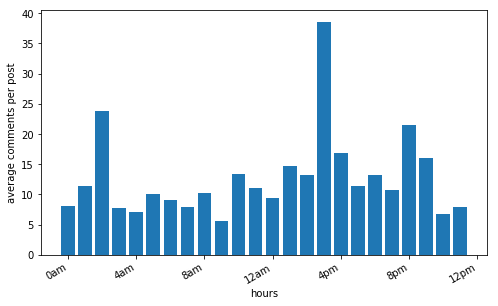

In [84]:
# Loop through each average and each hour of sorted_swap
hours = []
avg_comments = []
for row in sorted_swap:
    hour = dt.datetime.strptime(row[1],'%H').hour
    comments = row[0]
    hours.append(hour)
    avg_comments.append(comments)
    
# Create a plot
plt.figure(figsize=[8,5])
plt.bar(x=hours,height=avg_comments)
xloc = [0,4,8,12,16,20,24]
xticks = ['0am', '4am','8am','12am', '4pm', '8pm','12pm']
plt.xticks(xloc,xticks)
plt.xlabel('hours')
plt.ylabel('average comments per post')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()

<a id=conclude></a>
## Conclusion

From the results, creating a post during 3 pm (Eastern US time) tends to have a higher chance of receiving the most number of comments. To summarize by means of the period of time as a range, one should create a post during 3-4 pm, 8-9 pm and 2 am.